## Customer Support Ticket Triage System

In [2]:
from typing_extensions import TypedDict
from typing import List, Optional

In [3]:
class TicketState(TypedDict):
    ticket_id: str
    issue: str
    priority: Optional[str]
    assingned_to:Optional[str]
    history : List[str]

In [19]:
def recived_ticket(state:TicketState):
    print("Ticket received ....")
    return({
        "ticket_id": state["ticket_id"],
        "issue": state["issue"],
        "priority": None,
        "assigned_to": None,
        "history": state["history"]+["Ticket received"]
    })

In [20]:
def senior_support(state:TicketState):
    print("Asssinging to Senior Support")
    return({
        "ticket_id": state["ticket_id"],
        "issue": state["issue"],
        "priority": "High",
        "assigned_to": "Senior Support Team",
        "history": state["history"]+["Assigned to Senior Support"]
        })

In [21]:
def junior_support(state:TicketState):
    print("Asssinging to junior Support")
    return({
        "ticket_id": state["ticket_id"],
        "issue": state["issue"],
        "priority": "Normal",
        "assigned_to": "Junior Support Team",
        "history": state["history"]+["Assigned to Junior Support"]
        })

In [22]:
import random
from typing import Literal


In [23]:
def classify_ticket(state:TicketState)-> Literal["senior","junior"]:
    urgent_keywords = ["payment","crash","down","security"]

    if any(word in state["issue"].lower() for word in urgent_keywords):
        return "senior"

    else:
        return "junior"

In [24]:
from langgraph.graph import StateGraph , START , END

graph = StateGraph(TicketState)

## adding nodes
graph.add_node("receive", recived_ticket)
graph.add_node("senior", senior_support)
graph.add_node("junior", junior_support)


In [25]:
graph.add_edge(START ,"receive")
graph.add_conditional_edges("receive", classify_ticket)
graph.add_edge("senior", END)
graph.add_edge("junior",END)

In [26]:
graph_builder = graph.compile()

In [27]:
result = graph_builder.invoke({
    "ticket_id":"TCK-101",
    "issue": "Payment failed and app crashed",
    "priority":None,
    "assigned_to": None,
    "history": []
})

print(result)

Ticket received ....
Asssinging to Senior Support
{'ticket_id': 'TCK-101', 'issue': 'Payment failed and app crashed', 'priority': 'High', 'history': ['Ticket received', 'Assigned to Senior Support']}


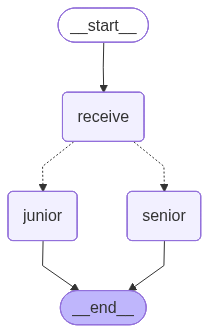

In [28]:
from IPython.display import display, Image

display(Image(graph_builder.get_graph().draw_mermaid_png()))